In [31]:
import pandas as pd
# Class of k-Nearest Neigbor Classifier
class kNN():
    def __init__(self, k = 3, exp = 2):
    # constructor for kNN classifier 
    # k is the number of neighbor for local class estimation
    # exp is the exponent for the Minkowski distance
        self.k = k
        self.exp = exp
      
    def fit(self, X_train, Y_train):
    # training k-NN method
    # X_train is the training data given with input attributes. n-th row correponds to n-th instance.
    # Y_train is the output data (output vector): n-th element of Y_train is the output value for n-th instance in X_train.
        self.X_train = X_train
        self.Y_train = Y_train   

        # call normalise method
         
    def getDiscreteClassification(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
            # call normalise method

        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # Note that the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test

    
    def Minkowski_distance(self, x1, x2):
    # computes the Minkowski distance of x1 and x2 for two labeled instances (x1,y1) and (x2,y2)
    
        # Set initial distance to 0
        distance = 0
    
        # Calculate Minkowski distance using the exponent exp
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        
        distance = distance**(1/self.exp)
    
        return distance
    
    # compare the results with and without the normalize method. save the resulting graphs
    def normalize(self, X_train, X_test):
        minValueTrain = X_train.min()
        maxValueTrain = X_train.max()
        normalized_X_train = (X_train - minValueTrain) / (maxValueTrain - minValueTrain)
        #normalization formula: normalising the the data with max and min values from the dataset

        minValueTest = X_test.min()
        maxValueTest = X_test.max()
        normalized_X_test = (X_test - minValueTest) / (maxValueTest - minValueTest)
        
        return normalized_X_train, normalized_X_test
    
    def getDistances(self, testInstance):
        #! computes distances between testInstance and all instances in X_train
        #! decided to create a separate method for this to reduce redundancy.
        #! i noticed it upon writing the methods separately.
        
        #! i hope this is logically equivalent. im a little skeptical about it. 

        distances = []

        for j in range(len(self.X_train)):
            trainInstance = self.X_train.iloc[j]
            # iloc is to get the j-index value from the dataset. imported from pandas
            
            distance = self.Minkowski_distance(testInstance, trainInstance)
            distances.append((distance, self.Y_train.iloc[j]))

        distances.sort(key=lambda x: x[0])
        return distances[:self.k]

    def getClassProbs(self, X_test):
        #! we were never asked to test here
        classProbability = []

        for i in range(len(X_test)):
            testInstance = X_test.iloc[i]

            kNearest = self.getDistances(testInstance)
            classes = [value for (dist, value) in kNearest]

            classProbabilitiesIndividual = pd.Series(classes).value_counts(normalize=True).sort_index()
            classProbability.append(classProbabilitiesIndividual)

        classProbabilityData = pd.DataFrame(classProbability)
        return classProbabilityData

    def getPrediction(self, X_test):
        regressionValues = []

        for i in range(len(X_test)):
            testInstance = X_test.iloc[i]

            kNearest = self.getDistances(testInstance)
            regressionValueIndividual = sum(float(value) for (dist, value) in kNearest) / self.k

            regressionValues.append(regressionValueIndividual)

        regressionSeries = pd.Series(regressionValues)
        return regressionSeries


Text(0, 0.5, 'Accuracy or Mean Absolute Error')

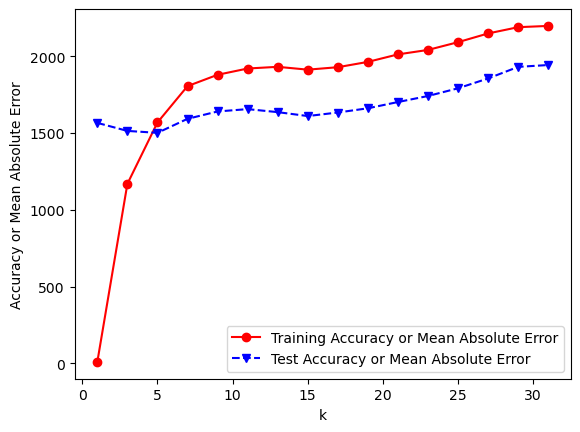

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error  
from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

#trainAcc = np.zeros(len(k_range))
#testAcc = np.zeros(len(k_range))

#index = 0 
#for k  in  k_range:
#    clf = kNN(k)
#    clf.fit(X_train, Y_train)
#    Y_predTrain = clf.getDiscreteClassification(X_train)
#   Y_predTest = clf.getDiscreteClassification(X_test)
#    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
#    testAcc[index] = accuracy_score(Y_test, Y_predTest)
 #   index += 1

train_absolute = np.zeros(len(k_range))
test_absolute = np.zeros(len(k_range))


index = 0
for k in k_range:
    clf = kNN(k)  # Assuming you've defined your kNN class properly
    clf.fit(X_train, Y_train)
   
#   Use 'getPrediction' method for regression prediction
    Y_predTrain = clf.getPrediction(X_train)
    Y_predTest = clf.getPrediction(X_test)
    
#   Calculate MAE for training and test sets
    train_absolute[index] = mean_absolute_error(Y_train, Y_predTrain)
    test_absolute[index] = mean_absolute_error(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,train_absolute,'ro-',k_range,test_absolute,'bv--')
plt.legend(['Training Accuracy or Mean Absolute Error','Test Accuracy or Mean Absolute Error'])
plt.xlabel('k')
plt.ylabel('Accuracy or Mean Absolute Error')


Text(0, 0.5, 'Accuracy')

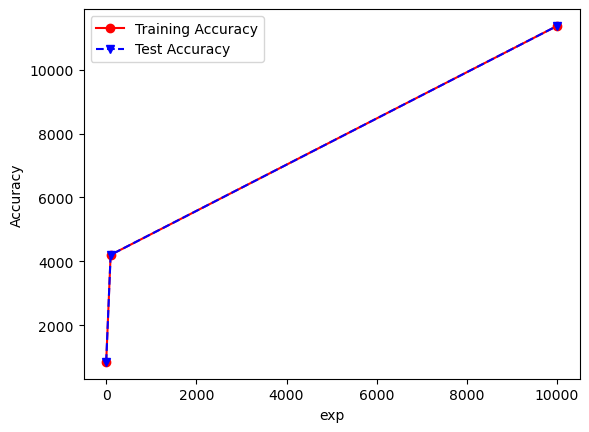

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from numpy.random import random

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

exp_range = [2, 100, 10000]

train_absolute = np.zeros(len(exp_range))
test_absolute = np.zeros(len(exp_range))

index = 0
for exp in exp_range:
    clf = kNN(exp)  
    clf.fit(X_train, Y_train)
    
    Y_predTrain = clf.getPrediction(X_train)
    Y_predTest = clf.getPrediction(X_test)
    
    train_absolute[index] = mean_absolute_error(Y_train, Y_predTrain)
    test_absolute[index] = mean_absolute_error(Y_test, Y_predTest)
    index += 1


#trainAcc = np.zeros(len(exp_range))
#testAcc = np.zeros(len(exp_range))


#index = 0 
#for exp  in  exp_range:
#    clf = kNN(k = 3, exp = exp)
#    clf.fit(X_train, Y_train)
#    Y_predTrain = clf.getDiscreteClassification(X_train)
#    Y_predTest = clf.getDiscreteClassification(X_test)
#    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
#    testAcc[index] = accuracy_score(Y_test, Y_predTest)
#    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(exp_range,train_absolute,'ro-',exp_range,train_absolute,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')


In [12]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

In [13]:
data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,class
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101,5800,23,29,16430
